# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [207]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [208]:
#Ratioanle check
import json
url = "https://api.openweathermap.org/data/2.5/weather?"
city = cities[0]
city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
response = requests.get(city_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": 70.9221,
        "lon": -8.7187
    },
    "dt": 1700947626,
    "id": 7535941,
    "main": {
        "feels_like": -8.74,
        "grnd_level": 1011,
        "humidity": 71,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": -2.28,
        "temp_max": -2.28,
        "temp_min": -2.28
    },
    "name": "Olonkinbyen",
    "sys": {
        "country": "SJ",
        "sunrise": 0,
        "sunset": 0
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 7,
        "gust": 7.31,
        "speed": 6.78
    }
}


In [209]:
#Check individual response
dt1 = response['dt']
time.strftime("%d-%b-%Y", time.gmtime(dt1))


'25-Nov-2023'

In [210]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | nova sintra
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | reyes
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | laguna
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | swakopmund
Processing Record 11 of Set 1 | labuan
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | buzias
Processing Record 15 of Set 1 | zhezqazghan
Processing Record 16 of Set 1 | nadym
Processing Record 17 of Set 1 | maur
Processing Record 18 of Set 1 | mek'ele
Processing Record 19 of Set 1 | marka
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | badger
Processing Record 23 of Set 1 | lebu
P

Processing Record 40 of Set 4 | malvan
Processing Record 41 of Set 4 | al kiremit al 'arakiyyin
City not found. Skipping...
Processing Record 42 of Set 4 | flying fish cove
Processing Record 43 of Set 4 | mazagao
Processing Record 44 of Set 4 | san fernando de apure
Processing Record 45 of Set 4 | fada
Processing Record 46 of Set 4 | laojunmiao
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | chernyshevsk
Processing Record 0 of Set 5 | tazacorte
Processing Record 1 of Set 5 | chonchi
Processing Record 2 of Set 5 | sheridan
Processing Record 3 of Set 5 | puerto aysen
Processing Record 4 of Set 5 | uaboe
City not found. Skipping...
Processing Record 5 of Set 5 | paramonga
Processing Record 6 of Set 5 | savave village
City not found. Skipping...
Processing Record 7 of Set 5 | mil'kovo
Processing Record 8 of Set 5 | barrouallie
Processing Record 9 of Set 5 | palmer
Processing Record 10 of Set 5 | kataragama
City not found.

Processing Record 27 of Set 8 | hermanus
Processing Record 28 of Set 8 | qarqaraly
Processing Record 29 of Set 8 | arno
Processing Record 30 of Set 8 | itamaraca
Processing Record 31 of Set 8 | tubarjal
Processing Record 32 of Set 8 | hilo
Processing Record 33 of Set 8 | biltine
Processing Record 34 of Set 8 | saundatti
Processing Record 35 of Set 8 | bogotol
Processing Record 36 of Set 8 | romanovka
Processing Record 37 of Set 8 | wajir
Processing Record 38 of Set 8 | gaya
Processing Record 39 of Set 8 | poronaysk
Processing Record 40 of Set 8 | virginia
Processing Record 41 of Set 8 | fortuna
Processing Record 42 of Set 8 | rurrenabaque
Processing Record 43 of Set 8 | abepura
Processing Record 44 of Set 8 | lalibela
Processing Record 45 of Set 8 | marsaskala
City not found. Skipping...
Processing Record 46 of Set 8 | traverse city
Processing Record 47 of Set 8 | ephrata
Processing Record 48 of Set 8 | chibougamau
Processing Record 49 of Set 8 | champerico
Processing Record 0 of Set 9

Processing Record 19 of Set 12 | rhede
Processing Record 20 of Set 12 | shajiang
Processing Record 21 of Set 12 | takanabe
Processing Record 22 of Set 12 | tughyl
Processing Record 23 of Set 12 | amurzet
Processing Record 24 of Set 12 | bonthe
Processing Record 25 of Set 12 | bath
Processing Record 26 of Set 12 | mossel bay
Processing Record 27 of Set 12 | olinda
Processing Record 28 of Set 12 | nieuw amsterdam
Processing Record 29 of Set 12 | el campo
Processing Record 30 of Set 12 | namibe
Processing Record 31 of Set 12 | yeppoon
Processing Record 32 of Set 12 | hasaki
Processing Record 33 of Set 12 | sakaiminato
Processing Record 34 of Set 12 | egilsstadir
Processing Record 35 of Set 12 | novellara
Processing Record 36 of Set 12 | lewiston orchards
Processing Record 37 of Set 12 | lengshuitan
Processing Record 38 of Set 12 | eyl
Processing Record 39 of Set 12 | quinte west
Processing Record 40 of Set 12 | arkalyk
Processing Record 41 of Set 12 | machilipatnam
Processing Record 42 of

In [211]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [212]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-2.28,71,6,6.78,SJ,1700947626
1,yellowknife,62.4560,-114.3525,-13.71,66,75,3.60,CA,1700947634
2,nova sintra,14.8667,-24.7167,22.44,73,28,8.62,CV,1700947634
3,puerto natales,-51.7236,-72.4875,9.25,66,36,9.06,CL,1700947635
4,reyes,-14.3167,-67.3833,26.26,76,100,0.38,BO,1700947635
...,...,...,...,...,...,...,...,...,...
579,beau vallon,-20.4189,57.6953,24.01,83,40,5.14,MU,1700947959
580,figuig (centre),32.1089,-1.2286,11.41,19,100,0.23,MA,1700947959
581,luderitz,-26.6481,15.1594,18.35,55,1,7.40,NA,1700947960
582,east falmouth,41.5784,-70.5586,2.23,47,0,0.00,US,1700947960


In [213]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [214]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-2.28,71,6,6.78,SJ,1700947626
1,yellowknife,62.4560,-114.3525,-13.71,66,75,3.60,CA,1700947634
2,nova sintra,14.8667,-24.7167,22.44,73,28,8.62,CV,1700947634
3,puerto natales,-51.7236,-72.4875,9.25,66,36,9.06,CL,1700947635
4,reyes,-14.3167,-67.3833,26.26,76,100,0.38,BO,1700947635


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

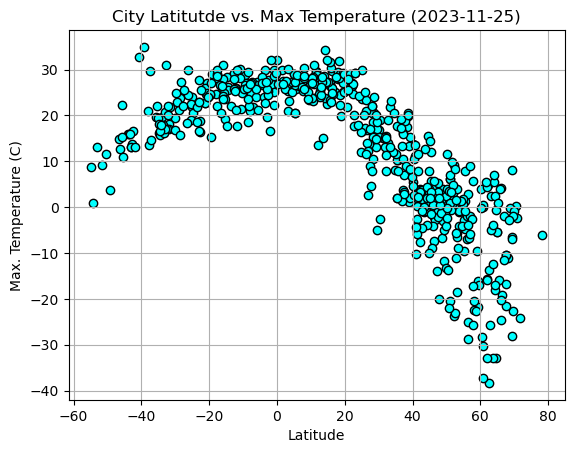

In [215]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df['Lat']
y_value = city_data_df['Max Temp']
plt.scatter(x_value, y_value,facecolors="aqua", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Max Temperature ({time.strftime('%Y-%m-%d', time.gmtime())})")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

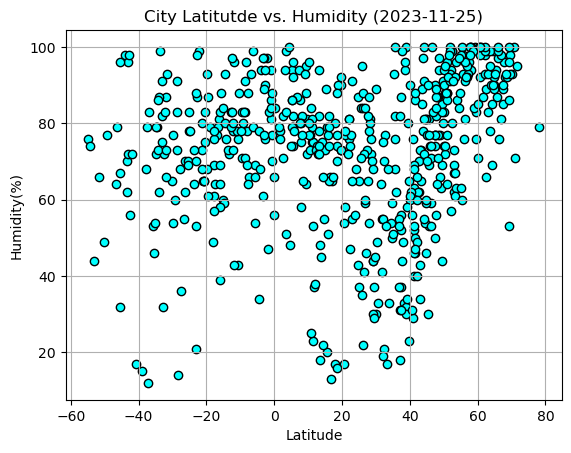

In [216]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df['Lat']
y_value = city_data_df['Humidity']
plt.scatter(x_value, y_value,facecolors="aqua", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Humidity ({time.strftime('%Y-%m-%d', time.gmtime())})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

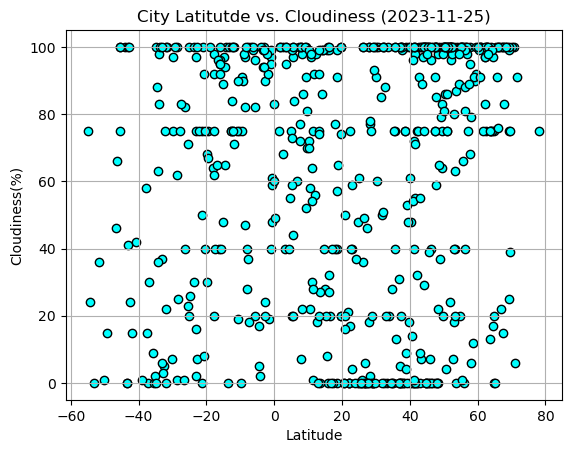

In [217]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df['Lat']
y_value = city_data_df['Cloudiness']
plt.scatter(x_value, y_value,facecolors="aqua", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Cloudiness ({time.strftime('%Y-%m-%d', time.gmtime())})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

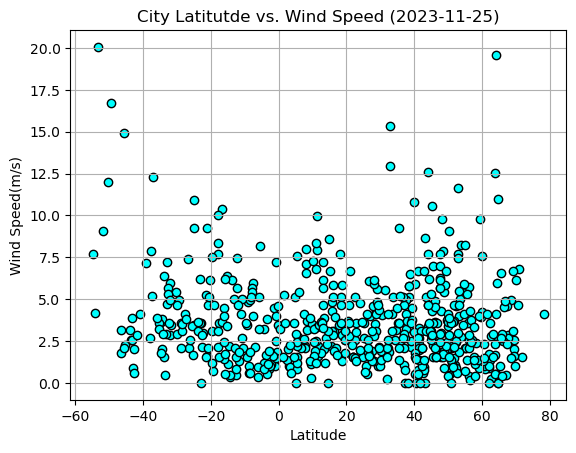

In [218]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df['Lat']
y_value = city_data_df['Wind Speed']
plt.scatter(x_value, y_value,facecolors="aqua", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Wind Speed ({time.strftime('%Y-%m-%d', time.gmtime())})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [219]:
# Define a function to create Linear Regression plots
def linregression(x_data, y_data,fit_x,fit_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    plt.scatter(x_data, y_data)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"the r value is: {round(rvalue,2)}")
    plt.annotate(line_eq,(fit_x,fit_y), fontsize=15,color="red")
    plt.plot(x_data,regress_values,"r-", label = line_eq)
    plt.xlabel(x_data.name)
    plt.ylabel(y_data.name)
    plt.show()

In [220]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-2.28,71,6,6.78,SJ,1700947626
1,yellowknife,62.4560,-114.3525,-13.71,66,75,3.60,CA,1700947634
2,nova sintra,14.8667,-24.7167,22.44,73,28,8.62,CV,1700947634
6,laguna,38.4210,-121.4238,17.38,33,0,5.14,US,1700947636
8,albany,42.6001,-73.9662,3.23,62,100,0.61,US,1700947498


In [221]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,9.25,66,36,9.06,CL,1700947635
4,reyes,-14.3167,-67.3833,26.26,76,100,0.38,BO,1700947635
5,invercargill,-46.4000,168.3500,12.79,79,66,1.79,NZ,1700947439
7,west island,-12.1568,96.8225,25.99,78,75,5.66,CC,1700947637
9,swakopmund,-22.6833,14.5333,16.47,87,7,2.17,NaN,1700947638


###  Temperature vs. Latitude Linear Regression Plot

the r value is: -0.85


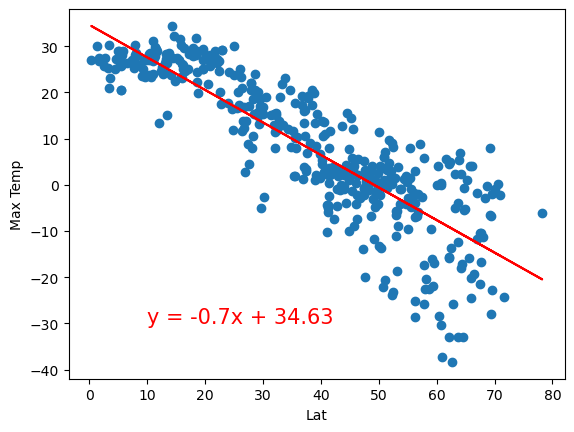

In [222]:
# Linear regression on Northern Hemisphere
linregression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],10,-30)

the r value is: 0.67


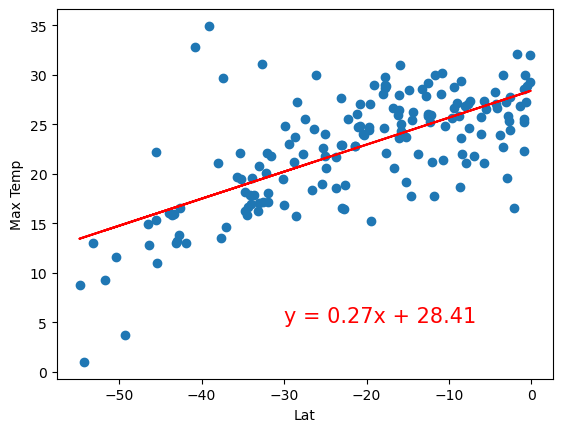

In [223]:
# Linear regression on Southern Hemisphere
linregression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],-30,5)

**Discussion about the linear relationship:**
Chart of Temp vs. Latitude on Northern Hemisphere indicates that there is high negative correlation between temperature and latitude. Its slopes represents that for every 10 increments on latitude, there is -7 degrees differences. On the Souther Hemisphere, it indicates that htere is medium positive correlation between temperature and latitude. Its slope represents taht for every 10 increments on latitude, there is 0.27 degree differences.

### Humidity vs. Latitude Linear Regression Plot

the r value is: 0.31


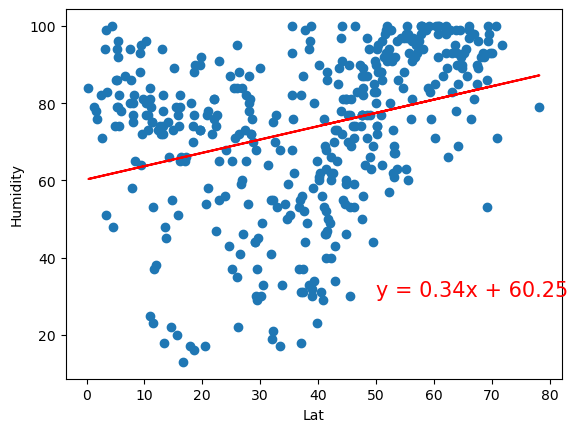

In [224]:
# Northern Hemisphere
linregression(northern_hemi_df['Lat'],northern_hemi_df["Humidity"],50,30)

the r value is: 0.23


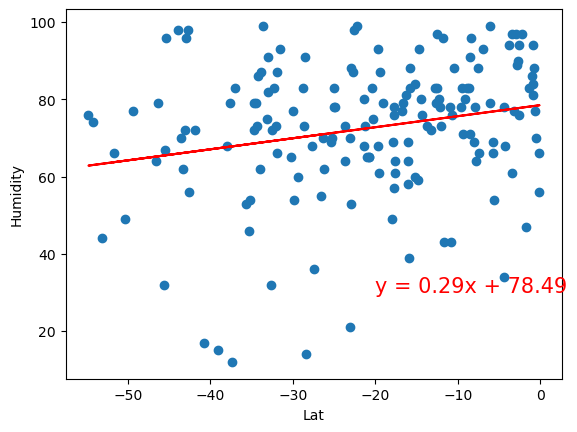

In [225]:
# Southern Hemisphere
linregression(southern_hemi_df['Lat'],southern_hemi_df["Humidity"],-20,30)

**Discussion about the linear relationship:** The charts of Humidity vs. Latitude on both Northern and Southern Hemisphere have relative low r-value, which represents low correlation between humidty and latutitude.

### Cloudiness vs. Latitude Linear Regression Plot

the r value is: 0.18


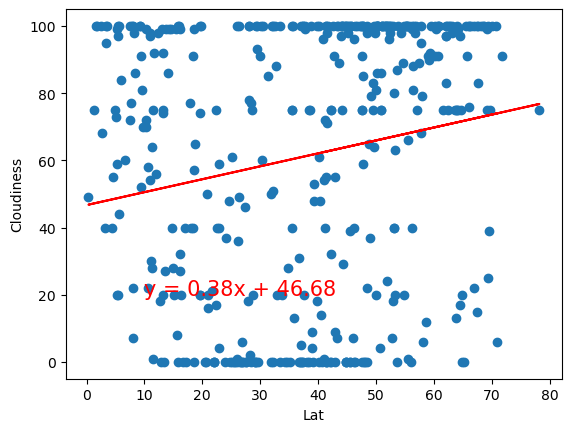

In [226]:
# Northern Hemisphere
linregression(northern_hemi_df['Lat'],northern_hemi_df["Cloudiness"],10,20)

the r value is: 0.28


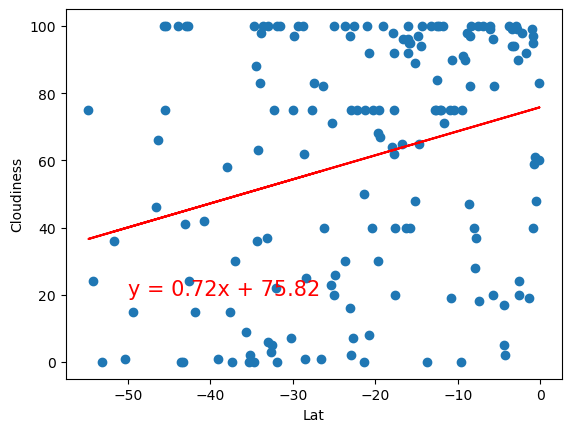

In [227]:
# Southern Hemisphere
linregression(southern_hemi_df['Lat'],southern_hemi_df["Cloudiness"],-50,20)

**Discussion about the linear relationship:** r-values on two charts above are relatively low, but based on the graphs, cloudiness does not seem to have any relationship with latitude, regardless of Northern and Southern Hemisphere.  

### Wind Speed vs. Latitude Linear Regression Plot

the r value is: 0.01


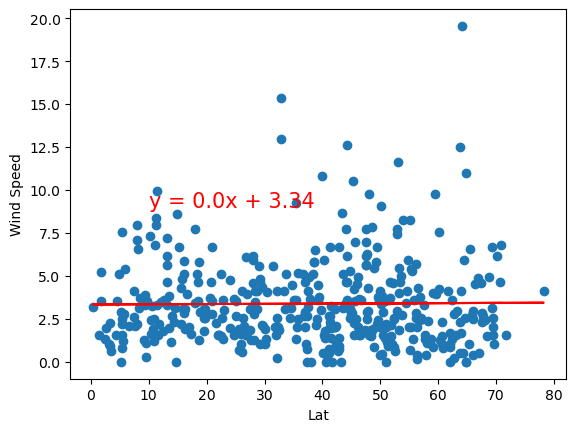

In [228]:
# Northern Hemisphere
linregression(northern_hemi_df['Lat'],northern_hemi_df["Wind Speed"],10,9)

the r value is: -0.34


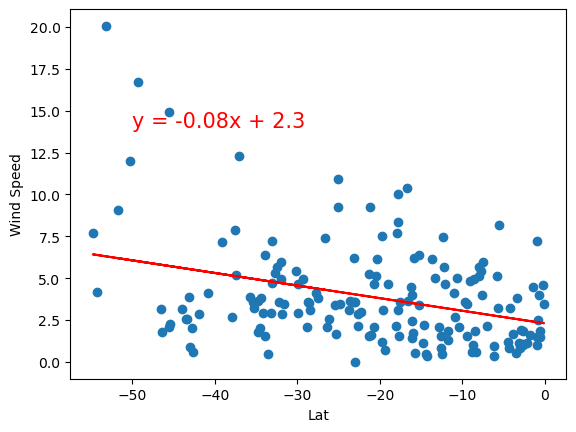

In [229]:
# Southern Hemisphere
linregression(southern_hemi_df['Lat'],southern_hemi_df["Wind Speed"],-50,14)

**Discussion about the linear relationship:** The r-value of the chart on the Northern Hemisphere indicates that there is no correlation between wind speed and latitiude. On the Southern Hemisphere, there is low negative correlation between wind speed and latitude. 